<style>
    body {
        font-family: Arial, sans-serif;
        font-size: 12px;
    }
    h1, h2, h3, h4, h5, h6 {
        font-family: 'Times New Roman', Times, serif;
        font-weight: bold;
    }
    p {
        font-style: italic;
    }
</style>



# Data Analytical Report
## Stack Overflow 2023 Developer Survey

### Source: https://www.kaggle.com/datasets/stackoverflow/stack-overflow-2023-developers-survey

# 1. Data Intialization

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir('C:/ReDI/project-01/')
!dir

 Volume in drive C is System
 Volume Serial Number is E602-195D

 Directory of C:\ReDI\project-01

04/03/2024  07:16 PM    <DIR>          .
03/27/2024  09:13 PM    <DIR>          ..
04/03/2024  07:23 PM    <DIR>          data-circle-team-C
03/25/2024  11:52 AM             2,064 README_2023.txt
03/25/2024  11:52 AM         1,365,015 so_survey_2023.pdf
03/25/2024  11:52 AM       158,626,799 survey_results_public.csv
03/25/2024  11:52 AM            16,442 survey_results_schema.csv
               4 File(s)    160,010,320 bytes
               3 Dir(s)  54,296,395,776 bytes free


In [3]:
df_raw = pd.read_csv("survey_results_public.csv")
df_raw

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,89180,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89180,89181,I agree,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
89181,89182,I agree,I code primarily as a hobby,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89182,89183,I agree,I am a developer by profession,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

#### There are 89183 Records in 84 columns, but there are some null values

In [5]:
# Removing the first raw with null values
df_raw.drop(0,inplace=True)
df_raw

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
5,6,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,30-60 minutes a day,15-30 minutes a day,DevOps function;Microservices;Observability to...,Other,Appropriate in length,Neither easy nor difficult,96828.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,89180,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89180,89181,I agree,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
89181,89182,I agree,I code primarily as a hobby,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89182,89183,I agree,I am a developer by profession,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-pe

In [6]:
#display 1st raw contains
df_raw.iloc[0]

ResponseId                                                             2
Q120                                                             I agree
MainBranch                                I am a developer by profession
Age                                                      25-34 years old
Employment                                           Employed, full-time
                                             ...                        
ProfessionalTech       DevOps function;Microservices;Automated testin...
Industry               Information Services, IT, Software Development...
SurveyLength                                       Appropriate in length
SurveyEase                                                          Easy
ConvertedCompYearly                                             285000.0
Name: 1, Length: 84, dtype: object

#### *** The Data set Contains total 89182 in 84 columns

In [7]:
df_raw.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89183.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44593.000000,1.036807e+42,11.405126,1.031101e+05
std,25745.058866,2.276847e+44,9.051989,6.814188e+05
min,2.000000,0.000000e+00,0.000000,1.000000e+00
25%,22297.500000,6.300000e+04,5.000000,4.390700e+04
50%,44593.000000,1.150000e+05,9.000000,7.496300e+04
75%,66888.500000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


#### *** The Data set has 89183 rows in 83 columns

In [8]:
df_raw.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89183 entries, 1 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89183 non-null  int64  
 1   Q120                                 89183 non-null  object 
 2   MainBranch                           89183 non-null  object 
 3   Age                                  89183 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [10]:
#:Let's link with Schema dataset to display Full Question
schema_raw = pd.read_csv("survey_results_schema.csv",index_col="qname").question

In [11]:
schema_raw

qname
S0             <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                       Browser Meta Info
Q310           <div><span style="font-size:19px;"><strong>You...
Q120                                                            
S1             <span style="font-size:22px; font-family: aria...
                                     ...                        
Knowledge_7    Waiting on answers to questions often causes i...
Knowledge_8    I feel like I have the tools and/or resources ...
Frequency_1    Needing help from people outside of your immed...
Frequency_2    Interacting with people outside of your immedi...
Frequency_3    Encountering knowledge silos (where one indivi...
Name: question, Length: 78, dtype: object

In [12]:
schema_raw['Employment']

'Which of the following best describes your current employment status? Select all that apply.'

# 2. Data Cleaing and Pre-Processing
### The Areas will covered:
2.1 Demographics
2.2 Distribution of Skills
2.3 Employment Releted Information

In [13]:
df_raw

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
5,6,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,30-60 minutes a day,15-30 minutes a day,DevOps function;Microservices;Observability to...,Other,Appropriate in length,Neither easy nor difficult,96828.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,89180,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89180,89181,I agree,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
89181,89182,I agree,I code primarily as a hobby,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89182,89183,I agree,I am a developer by profession,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-pe

In [14]:
selected_cols =['Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWantToWorkWith', 'AIDevHaveWorkedWith', 'AIDevWantToWorkWith',
       'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm',
       'SOAI', 'AISelect', 'AISent', 'AIAcc', 'AIBen',
       'AIToolInterested in Using', 'AIToolCurrently Using',
       'AIToolNot interested in Using', 'AINextVery different',
       'AINextNeither different nor similar', 'AINextSomewhat similar',
       'AINextVery similar', 'AINextSomewhat different', 'TBranch', 'ICorPM',
       'WorkExp', 'TimeSearching',
       'TimeAnswering', 'ProfessionalTech', 'Industry', 'ConvertedCompYearly']

In [15]:
len(selected_cols)

68

In [16]:
survey_df = df_raw[selected_cols].copy()
survey_df

,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,TimeSearching,TimeAnswering,ProfessionalTech,Industry,ConvertedCompYearly
1,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,...,NaN,NaN,Yes,People manager,10.0,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",285000.0
2,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,...,NaN,NaN,Yes,Individual contributor,23.0,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",250000.0
3,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NaN,12,7,...,NaN,NaN,Yes,Individual contributor,7.0,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,156000.0
4,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,6,4,...,NaN,NaN,Yes,Individual contributor,6.0,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,23456.0
5,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,Other,21,21,...,NaN,NaN,Yes,Individual contributor,22.0,30-60 minutes a day,15-30 minutes a day,DevOps function;Microservices;Observability to...,Other,96828.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,Udemy,20,5,...,NaN,Writing code;Documenting code;Debugging and ge...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89180,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,NaN,5,NaN,...,NaN,Learning about a codebase;Debugging and gettin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89181,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,Codecademy;Coursera,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89182,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,Udemy,3,NaN,...,NaN,Learning about a codebase;Writing code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
survey_df.shape

(89183, 68)

In [18]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89183 entries, 1 to 89183
Data columns (total 68 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  89183 non-null  object 
 1   Employment                           87898 non-null  object 
 2   RemoteWork                           73810 non-null  object 
 3   CodingActivities                     73764 non-null  object 
 4   EdLevel                              87973 non-null  object 
 5   LearnCode                            87663 non-null  object 
 6   LearnCodeOnline                      70084 non-null  object 
 7   LearnCodeCoursesCert                 37076 non-null  object 
 8   YearsCode                            87435 non-null  object 
 9   YearsCodePro                         66136 non-null  object 
 10  DevType                              76872 non-null  object 
 11  OrgSize                     

In [19]:
survey_df.describe()

,CompTotal,WorkExp,ConvertedCompYearly
count,4.822500e+04,43579.000000,4.801900e+04
mean,1.036807e+42,11.405126,1.031101e+05
std,2.276847e+44,9.051989,6.814188e+05
min,0.000000e+00,0.000000,1.000000e+00
25%,6.300000e+04,5.000000,4.390700e+04
50%,1.150000e+05,9.000000,7.496300e+04
75%,2.300000e+05,16.000000,1.216410e+05
max,5.000000e+46,50.000000,7.435143e+07


In [20]:
#Check for empty values

survey_df.Age.value_counts()

Age
25-34 years old       33247
35-44 years old       20532
18-24 years old       17930
45-54 years old        8334
Under 18 years old     4128
55-64 years old        3392
65 years or older      1171
Prefer not to say       449
Name: count, dtype: int64

In [21]:
survey_df.YearsCodePro.value_counts()

YearsCodePro
5                     4792
10                    4594
2                     4464
3                     4378
4                     3970
6                     3637
7                     3509
8                     3462
15                    2789
1                     2596
12                    2398
20                    2227
9                     2145
11                    2013
Less than 1 year      1836
13                    1690
25                    1449
16                    1278
14                    1256
18                    1212
17                    1146
23                    1112
30                     924
22                     845
24                     686
19                     649
21                     565
27                     490
26                     486
35                     462
28                     417
40                     329
32                     293
33                     264
29                     217
36                     200
31             

In [22]:
# need to convert into Interger
survey_df["YearsCodePro"] = pd.to_numeric(survey_df.YearsCodePro,errors="coerce")
survey_df.YearsCodePro.value_counts()

YearsCodePro
5.0     4792
10.0    4594
2.0     4464
3.0     4378
4.0     3970
6.0     3637
7.0     3509
8.0     3462
15.0    2789
1.0     2596
12.0    2398
20.0    2227
9.0     2145
11.0    2013
13.0    1690
25.0    1449
16.0    1278
14.0    1256
18.0    1212
17.0    1146
23.0    1112
30.0     924
22.0     845
24.0     686
19.0     649
21.0     565
27.0     490
26.0     486
35.0     462
28.0     417
40.0     329
32.0     293
33.0     264
29.0     217
36.0     200
31.0     187
34.0     177
38.0     164
37.0     150
45.0     102
39.0      99
42.0      81
41.0      79
43.0      67
44.0      42
46.0      33
48.0      30
47.0      24
50.0      24
49.0      14
Name: count, dtype: int64

In [23]:
survey_df.describe()

,YearsCodePro,CompTotal,WorkExp,ConvertedCompYearly
count,64217.000000,4.822500e+04,43579.000000,4.801900e+04
mean,11.508354,1.036807e+42,11.405126,1.031101e+05
std,9.070346,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,5.000000,6.300000e+04,5.000000,4.390700e+04
50%,9.000000,1.150000e+05,9.000000,7.496300e+04
75%,16.000000,2.300000e+05,16.000000,1.216410e+05
max,50.000000,5.000000e+46,50.000000,7.435143e+07


In [24]:
# Display for all the fields
for column in survey_df.columns:
#    if survey_df[column].nunique() < 50:
   # print(f"Value Counts for column--> '{column}':")
    print(survey_df[column].value_counts())
    print("\n")

Age
25-34 years old       33247
35-44 years old       20532
18-24 years old       17930
45-54 years old        8334
Under 18 years old     4128
55-64 years old        3392
65 years or older      1171
Prefer not to say       449
Name: count, dtype: int64


Employment
Employed, full-time                                                                                                                                                                                             53748
Student, full-time                                                                                                                                                                                               7430
Independent contractor, freelancer, or self-employed                                                                                                                                                             7076
Employed, full-time;Independent contractor, freelancer, or self-employed                   

In [25]:
# In the Employment column has multiple entries, so need to seperate those
def split_multi_values(df, column, delimiter=','):
    """
    Split values in a column separated by a delimiter into separate rows.
    
    Args:
        df (DataFrame): The DataFrame containing the column to split.
        column (str): The name of the column containing multi-values.
        delimiter (str, optional): The delimiter used to separate multi-values. Defaults to ','.
    
    Returns:
        DataFrame: A new DataFrame with multi-values split into separate rows.
    """
    # Create a copy of the original DataFrame
    df_copy = df.copy()
    
    # Split multi-values into separate rows
    df_copy[column] = df_copy[column].str.split(delimiter)
    df_copy = df_copy.explode(column)
    
    return df_copy

# Example usage:
# Assuming survey_df is your DataFrame and "Employment" is the column containing multi-values
survey_df_split = split_multi_values(survey_df, 'Employment')

In [26]:
survey_df_split

,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,TimeSearching,TimeAnswering,ProfessionalTech,Industry,ConvertedCompYearly
1,25-34 years old,Employed,Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9.0,...,NaN,NaN,Yes,People manager,10.0,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",285000.0
1,25-34 years old,full-time,Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9.0,...,NaN,NaN,Yes,People manager,10.0,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",285000.0
2,45-54 years old,Employed,"Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23.0,...,NaN,NaN,Yes,Individual contributor,23.0,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",250000.0
2,45-54 years old,full-time,"Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23.0,...,NaN,NaN,Yes,Individual contributor,23.0,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",250000.0
3,25-34 years old,Employed,"Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NaN,12,7.0,...,NaN,NaN,Yes,Individual contributor,7.0,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,156000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89182,Under 18 years old,Employed,"Hybrid (some remote, some in-person)",Hobby;School or academic work,"Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,Udemy,3,NaN,...,NaN,Learning about a codebase;Writing code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89182,Under 18 years old,part-time;Student,"Hybrid (some remote, some in-person)",Hobby;School or academic work,"Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,Udemy,3,NaN,...,NaN,Learning about a codebase;Writing code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89182,Under 18 years old,part-time,"Hybrid (some remote, some in-person)",Hobby;School or academic work,"Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,Udemy,3,NaN,...,NaN,Learning about a codebase;Writing code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89183,35-44 years old,Employed,"Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,Codecademy;Pluralsight;Coursera,17,12.0,...,NaN,Writing code,Yes,People manager,14.0,60-120 minutes a day,30-60 minutes a day,DevOps function;Develope

In [27]:
def split_multicolumn(col_series):
    result_df = pd.DataFrame(index=col_series.index)
    
    # Iterate over each value in the series
    for idx, value in col_series[col_series.notnull()].items():
        # Split the value into a list of options
        options = value.split(';')
        
        # Mark True for each option in the result DataFrame
        for option in options:
            result_df.at[idx, option] = True
    
    # Fill NaN values with False
    result_df.fillna(False, inplace=True)
    
    return result_df


In [28]:
emp_type_df = split_multicolumn(survey_df.Employment)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10212\925553695.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result_df.fillna(False, inplace=True)


In [29]:
emp_type_df

,"Employed, full-time","Independent contractor, freelancer, or self-employed","Not employed, but looking for work","Student, full-time","Employed, part-time","Student, part-time",I prefer not to say,Retired,"Not employed, and not looking for work"
1,True,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
89179,True,True,False,False,False,False,False,False,False
89180,False,False,False,True,True,False,False,False,False
89181,False,False,False,False,False,False,True,False,False
89182,False,False,False,False,True,True,False,False,False


# 3 Data Analysis
## 3.1 Univariate Analysis

In [30]:
#Let's summarize this information
emp_type_totals = emp_type_df.sum().sort_values(ascending = False)
emp_type_totals

Employed, full-time                                     60899
Independent contractor, freelancer, or self-employed    13988
Student, full-time                                      11768
Employed, part-time                                      5029
Not employed, but looking for work                       4178
Student, part-time                                       3390
Not employed, and not looking for work                   1380
Retired                                                   737
I prefer not to say                                       549
dtype: int64

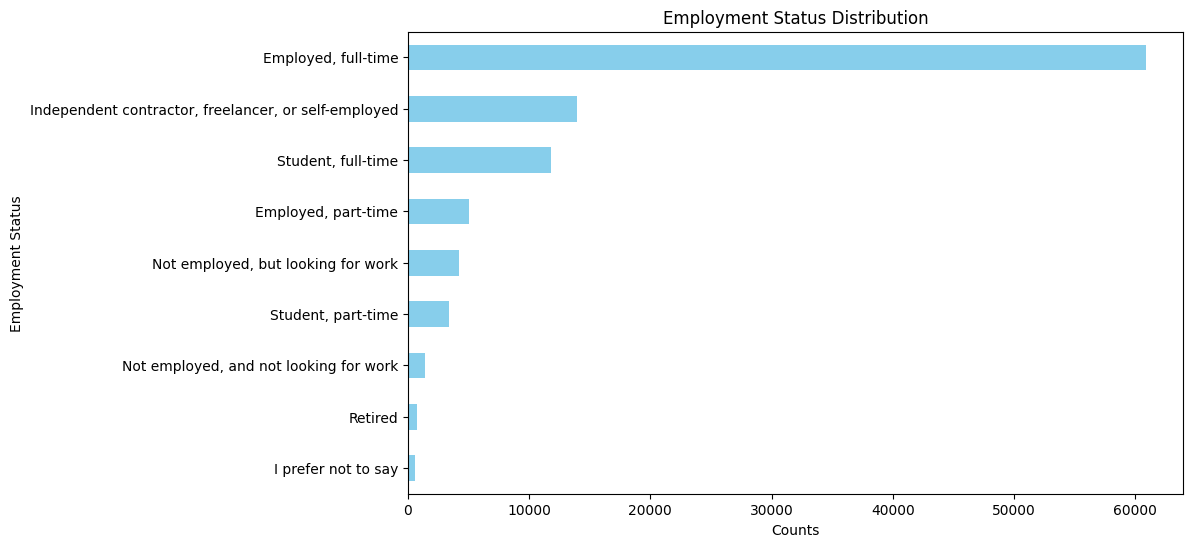

In [31]:
plt.figure(figsize=(10, 6))
emp_type_totals.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Employment Status')
plt.title('Employment Status Distribution')
plt.show()

In [32]:
#Let's summarize this information
emp_type_totals = emp_type_df.sum().sort_values(ascending = False)
emp_type_totals.info()

<class 'pandas.core.series.Series'>
Index: 9 entries, Employed, full-time to I prefer not to say
Series name: None
Non-Null Count  Dtype
--------------  -----
9 non-null      int64
dtypes: int64(1)
memory usage: 144.0+ bytes


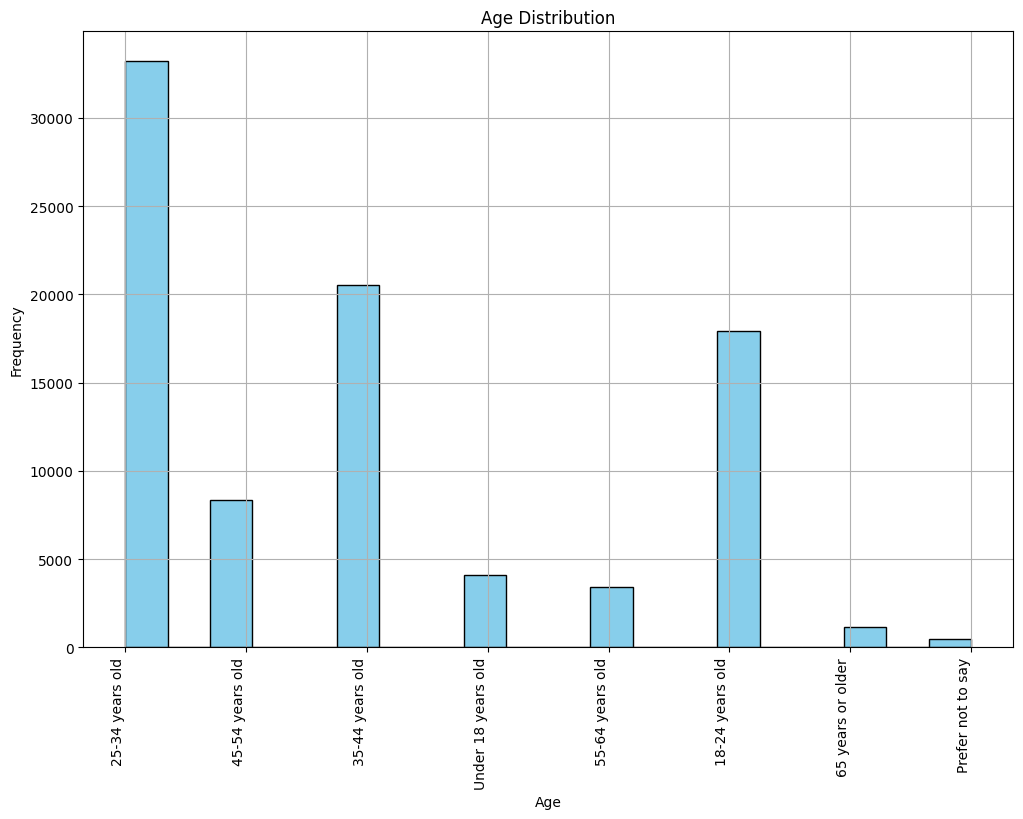

In [33]:
# Age
plt.figure(figsize=(12, 8))
plt.hist(survey_df['Age'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.xticks(rotation=90, ha='right') 
plt.grid(True)  # Add grid lines for better readability
plt.show()


In [34]:
survey_df.RemoteWork.value_counts()

RemoteWork
Hybrid (some remote, some in-person)    31131
Remote                                  30566
In-person                               12113
Name: count, dtype: int64

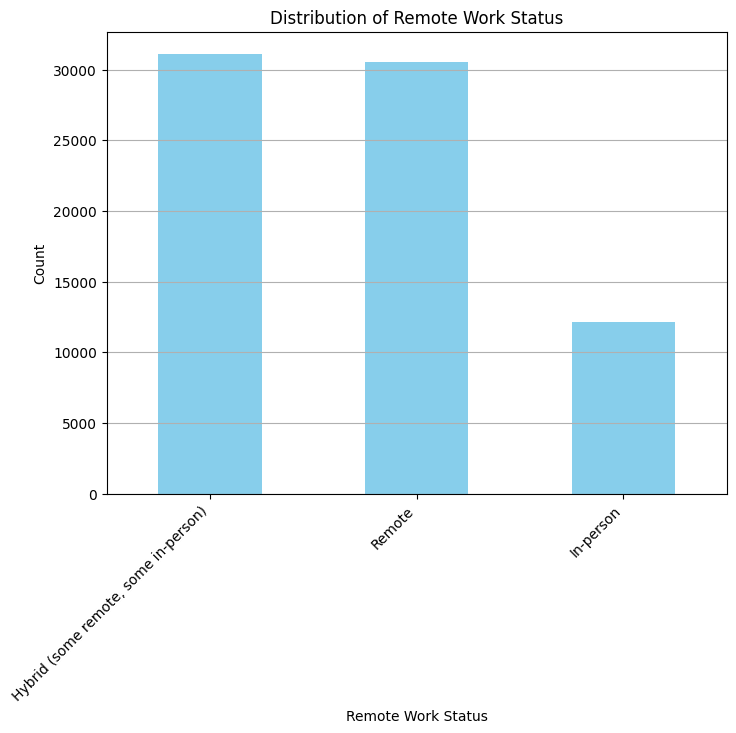

In [35]:
remote_work_counts = survey_df['RemoteWork'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
remote_work_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Remote Work Status')
plt.ylabel('Count')
plt.title('Distribution of Remote Work Status')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines on the y-axis
plt.show()

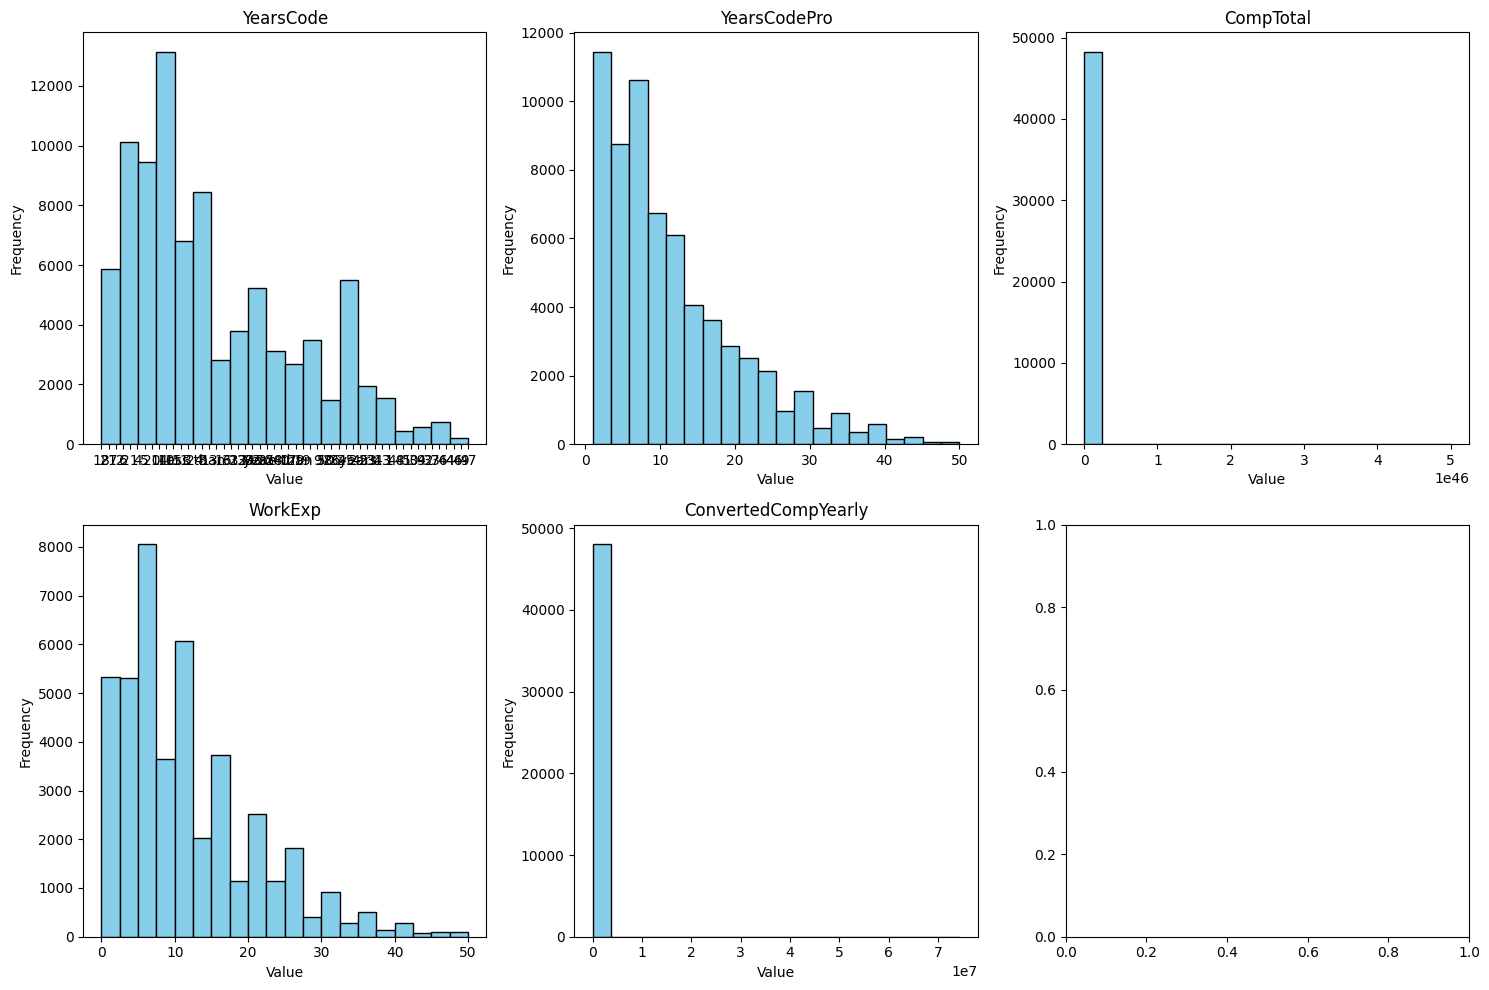

In [36]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Columns to plot
columns_to_plot = ['YearsCode', 'YearsCodePro', 'CompTotal', 'WorkExp', 'ConvertedCompYearly']

# Plot histograms for each column
for i, column in enumerate(columns_to_plot):
    ax = axes[i//3, i%3]  # Get the current subplot
    ax.hist(survey_df[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

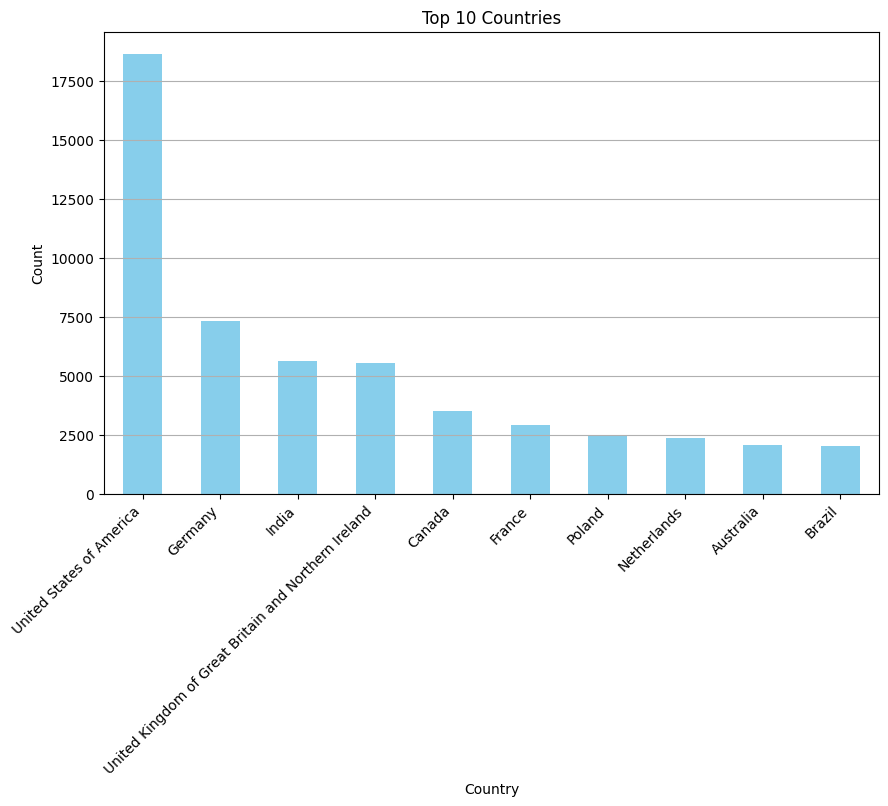

In [37]:
# Get top N countries
Country_counts = df_raw['Country'].value_counts()
N = 10  # Number of top countries to show
top_countries = Country_counts.head(N)

# Plotting
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title(f'Top {N} Countries')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines on the y-axis
plt.show()

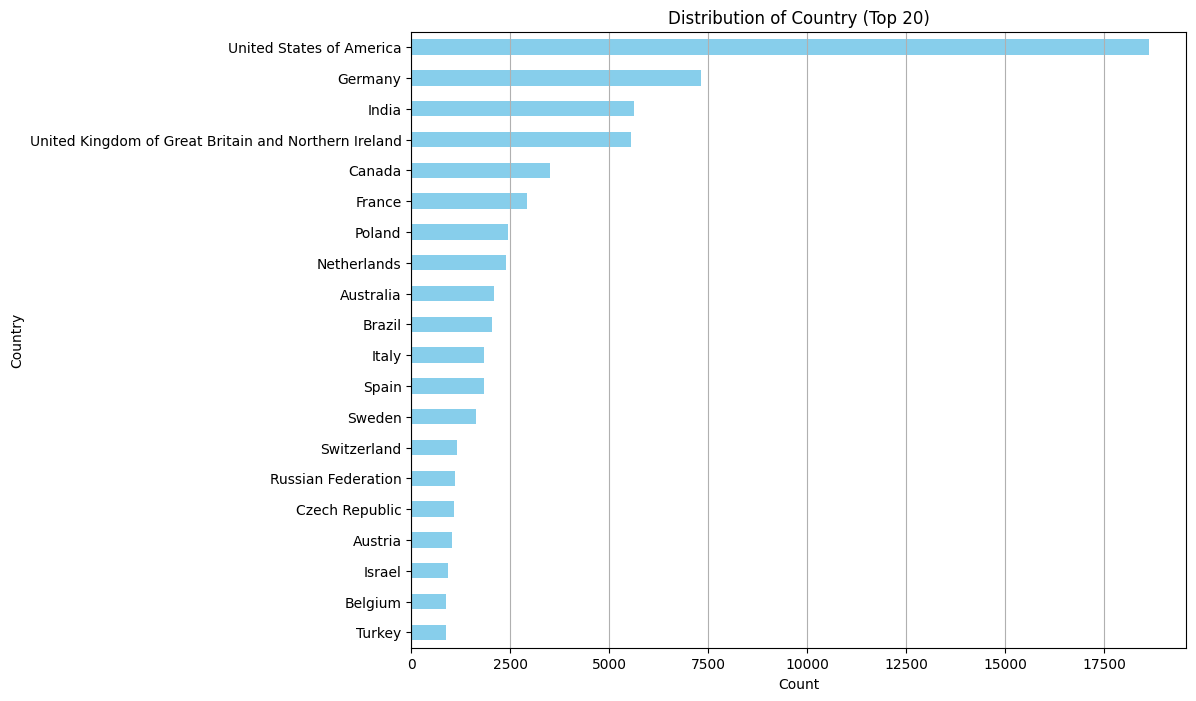

In [38]:
# Plotting
plt.figure(figsize=(10, 8))
Country_counts.head(20).sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Distribution of Country (Top 20)')
plt.grid(axis='x')  # Add grid lines on the x-axis
plt.show()

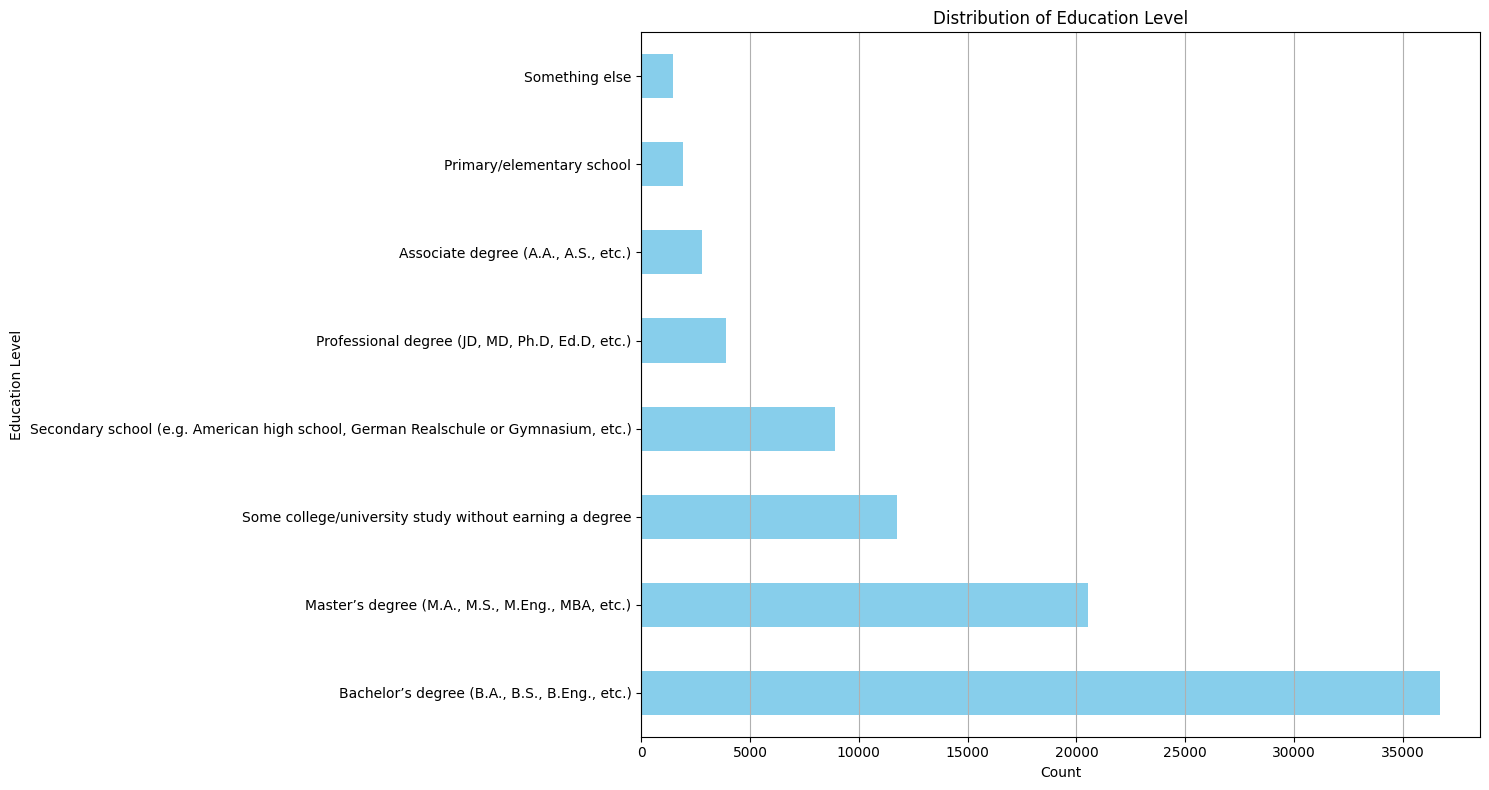

In [39]:
# Value counts of the 'EdLevel' column
ed_level_counts = survey_df['EdLevel'].value_counts()

# Plotting
plt.figure(figsize=(15, 8))
ed_level_counts.plot(kind='barh', color='skyblue')  # Use 'barh' for horizontal bar plot
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.title('Distribution of Education Level')
plt.grid(axis='x')  # Add grid lines on the x-axis
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

In [40]:
unique_years = survey_df['YearsCode'].unique()
print(unique_years)

['18' '27' '12' '6' '21' '4' '5' '20' '14' '10' '15' '11' '3' '24' '8'
 '13' 'Less than 1 year' '16' '33' '22' '30' '32' '7' '35' '28' nan '40'
 '17' '29' '19' 'More than 50 years' '9' '38' '26' '34' '25' '2' '45' '23'
 '31' '43' '1' '48' '41' '50' '39' '42' '37' '36' '44' '46' '49' '47']


In [41]:
survey_df['YearsCode'].unique()

array(['18', '27', '12', '6', '21', '4', '5', '20', '14', '10', '15',
       '11', '3', '24', '8', '13', 'Less than 1 year', '16', '33', '22',
       '30', '32', '7', '35', '28', nan, '40', '17', '29', '19',
       'More than 50 years', '9', '38', '26', '34', '25', '2', '45', '23',
       '31', '43', '1', '48', '41', '50', '39', '42', '37', '36', '44',
       '46', '49', '47'], dtype=object)

In [42]:
year_mapping = {
    'Less than 1 year': 0,
    'More than 50 years': 51,  # Assuming a high numeric value for 'More than 50 years'
    np.nan: 0  # Map NaN (missing values) to 0
}

survey_df['YearsCode'].fillna('nan', inplace=True)  # Fill NaN with 'nan' string
# Apply the mapping to create a new column 'YearsCode_Num'
survey_df['YearsCode_Num'] = survey_df['YearsCode'].map(year_mapping).astype(float)

# Display the resulting DataFrame with original and mapped columns
print(survey_df[['YearsCode', 'YearsCode_Num']])

      YearsCode  YearsCode_Num
1            18            NaN
2            27            NaN
3            12            NaN
4             6            NaN
5            21            NaN
...         ...            ...
89179        20            NaN
89180         5            NaN
89181        10            NaN
89182         3            NaN
89183        17            NaN

[89183 rows x 2 columns]


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10212\97928048.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  survey_df['YearsCode'].fillna('nan', inplace=True)  # Fill NaN with 'nan' string


TypeError: can only concatenate str (not "int") to str

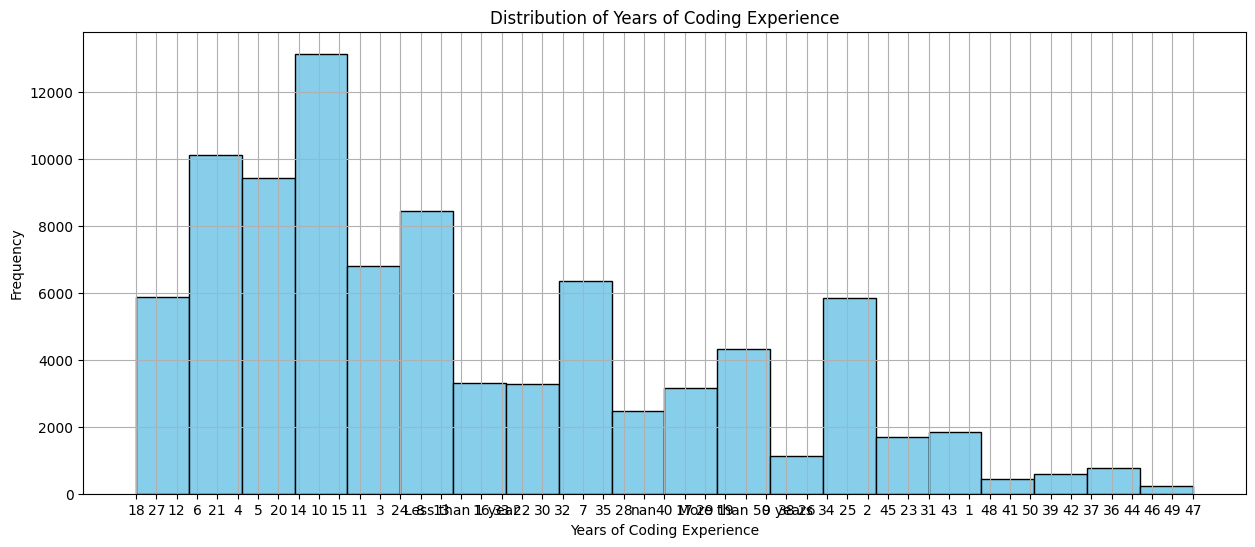

In [43]:
# Plotting histogram for 'YearsCode' column
plt.figure(figsize=(15, 6))
plt.hist(survey_df['YearsCode'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Years of Coding Experience')
plt.ylabel('Frequency')
plt.title('Distribution of Years of Coding Experience')
plt.grid(True)  # Add grid lines for better readability

# Adjust x-axis scale by 1
plt.xticks(np.arange(0, survey_df['YearsCode'].max() + 1, step=1))

plt.show()

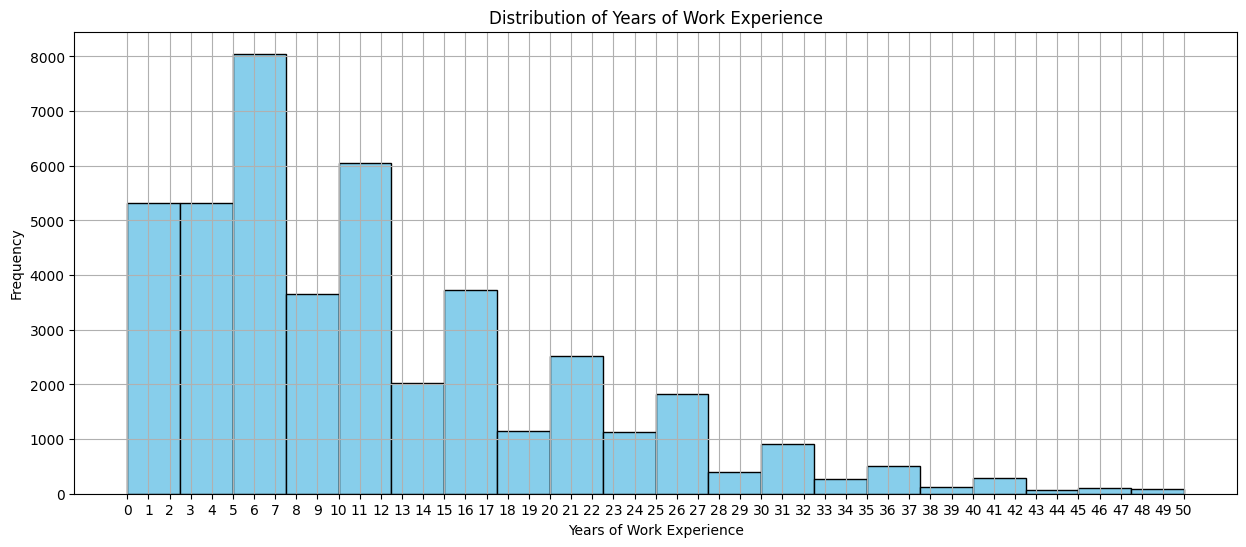

In [ ]:
# Plotting histogram for 'WorkExp' column
plt.figure(figsize=(15, 6))
plt.hist(survey_df['WorkExp'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Years of Work Experience')
plt.ylabel('Frequency')
plt.title('Distribution of Years of Work Experience')
plt.grid(True)  # Add grid lines for better readability

# Adjust x-axis scale by 1
plt.xticks(np.arange(0, survey_df['WorkExp'].max() + 1, step=1))

plt.show()

## 3.2 By Variate Analysis

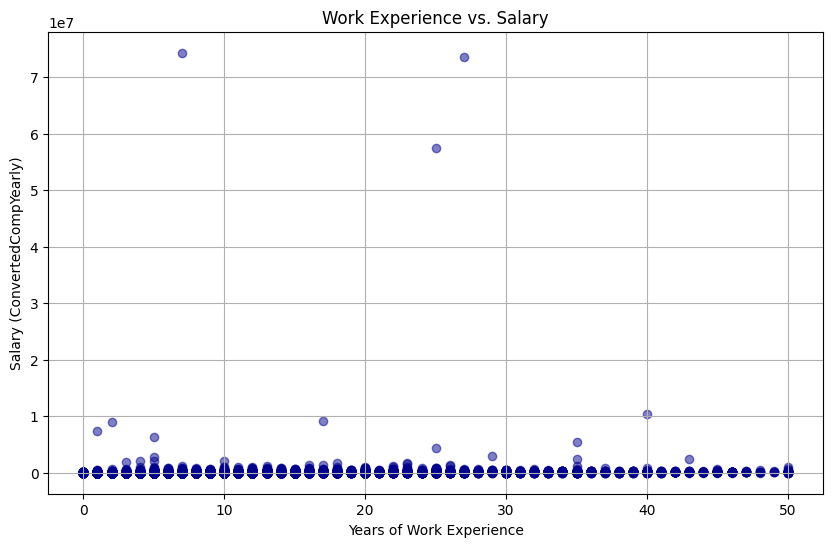

In [ ]:
# Plotting scatter plot for Work Experience vs. Salary
plt.figure(figsize=(10, 6))
plt.scatter(survey_df['WorkExp'], survey_df['ConvertedCompYearly'], color='DarkBlue', alpha=0.5)
plt.xlabel('Years of Work Experience')
plt.ylabel('Salary (ConvertedCompYearly)')
plt.title('Work Experience vs. Salary')
plt.grid(True)  # Add grid lines for better readability
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30540\1115623508.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EdLevel', y='WorkExp', data=survey_df, palette='Set3')


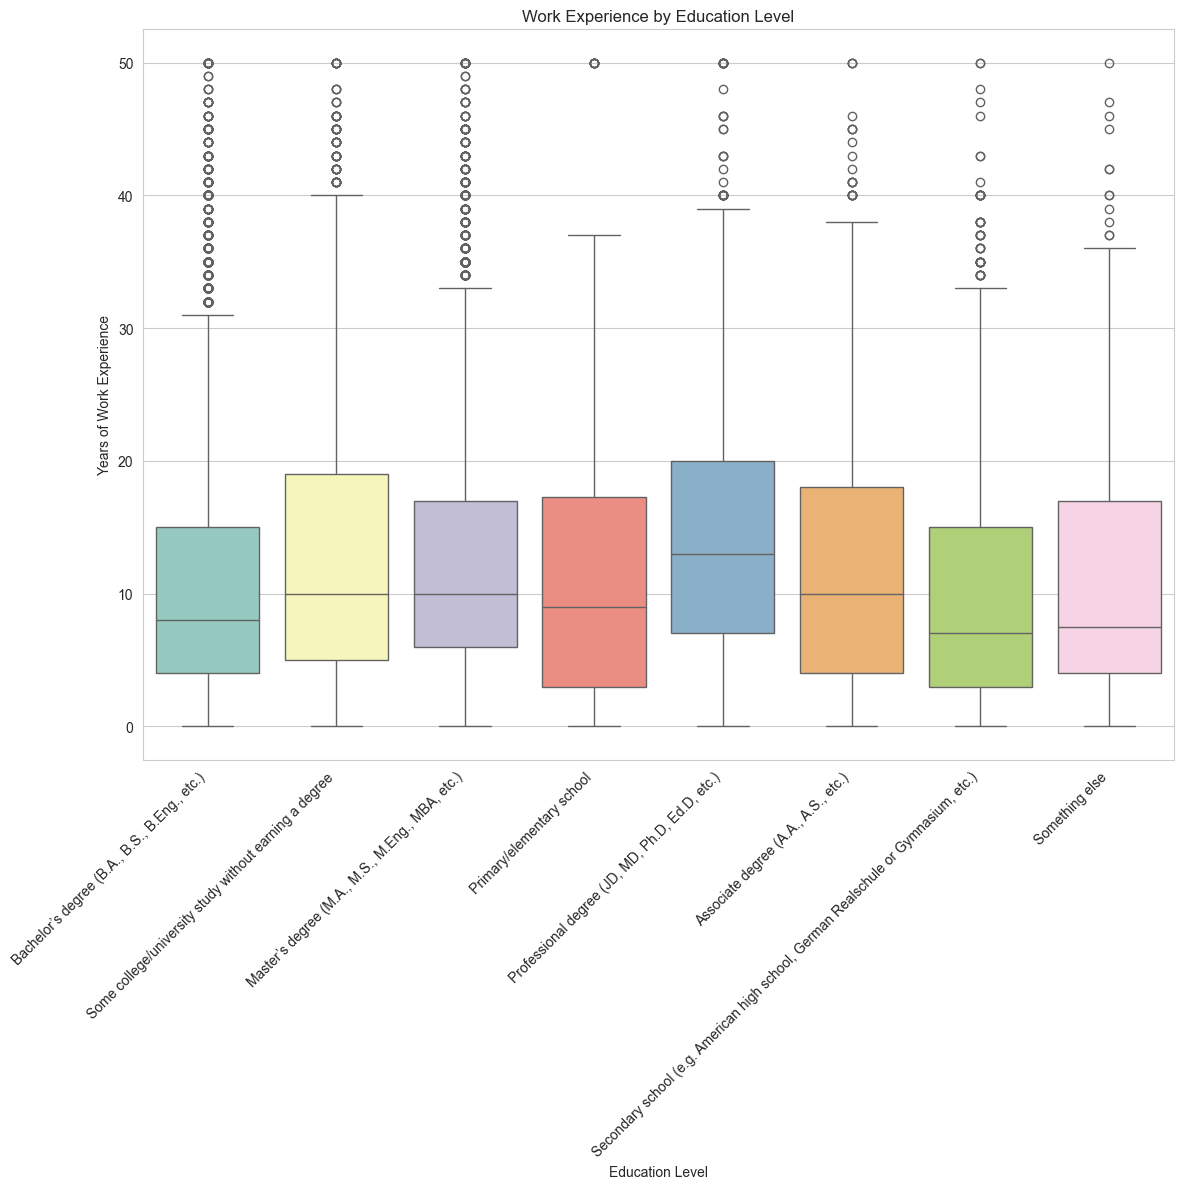

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting box plot for Work Experience by Education Level
plt.figure(figsize=(12, 12))
sns.boxplot(x='EdLevel', y='WorkExp', data=survey_df, palette='Set3')
plt.xlabel('Education Level')
plt.ylabel('Years of Work Experience')
plt.title('Work Experience by Education Level')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30540\1352131139.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='WorkExp', data=survey_df, palette='Set3')


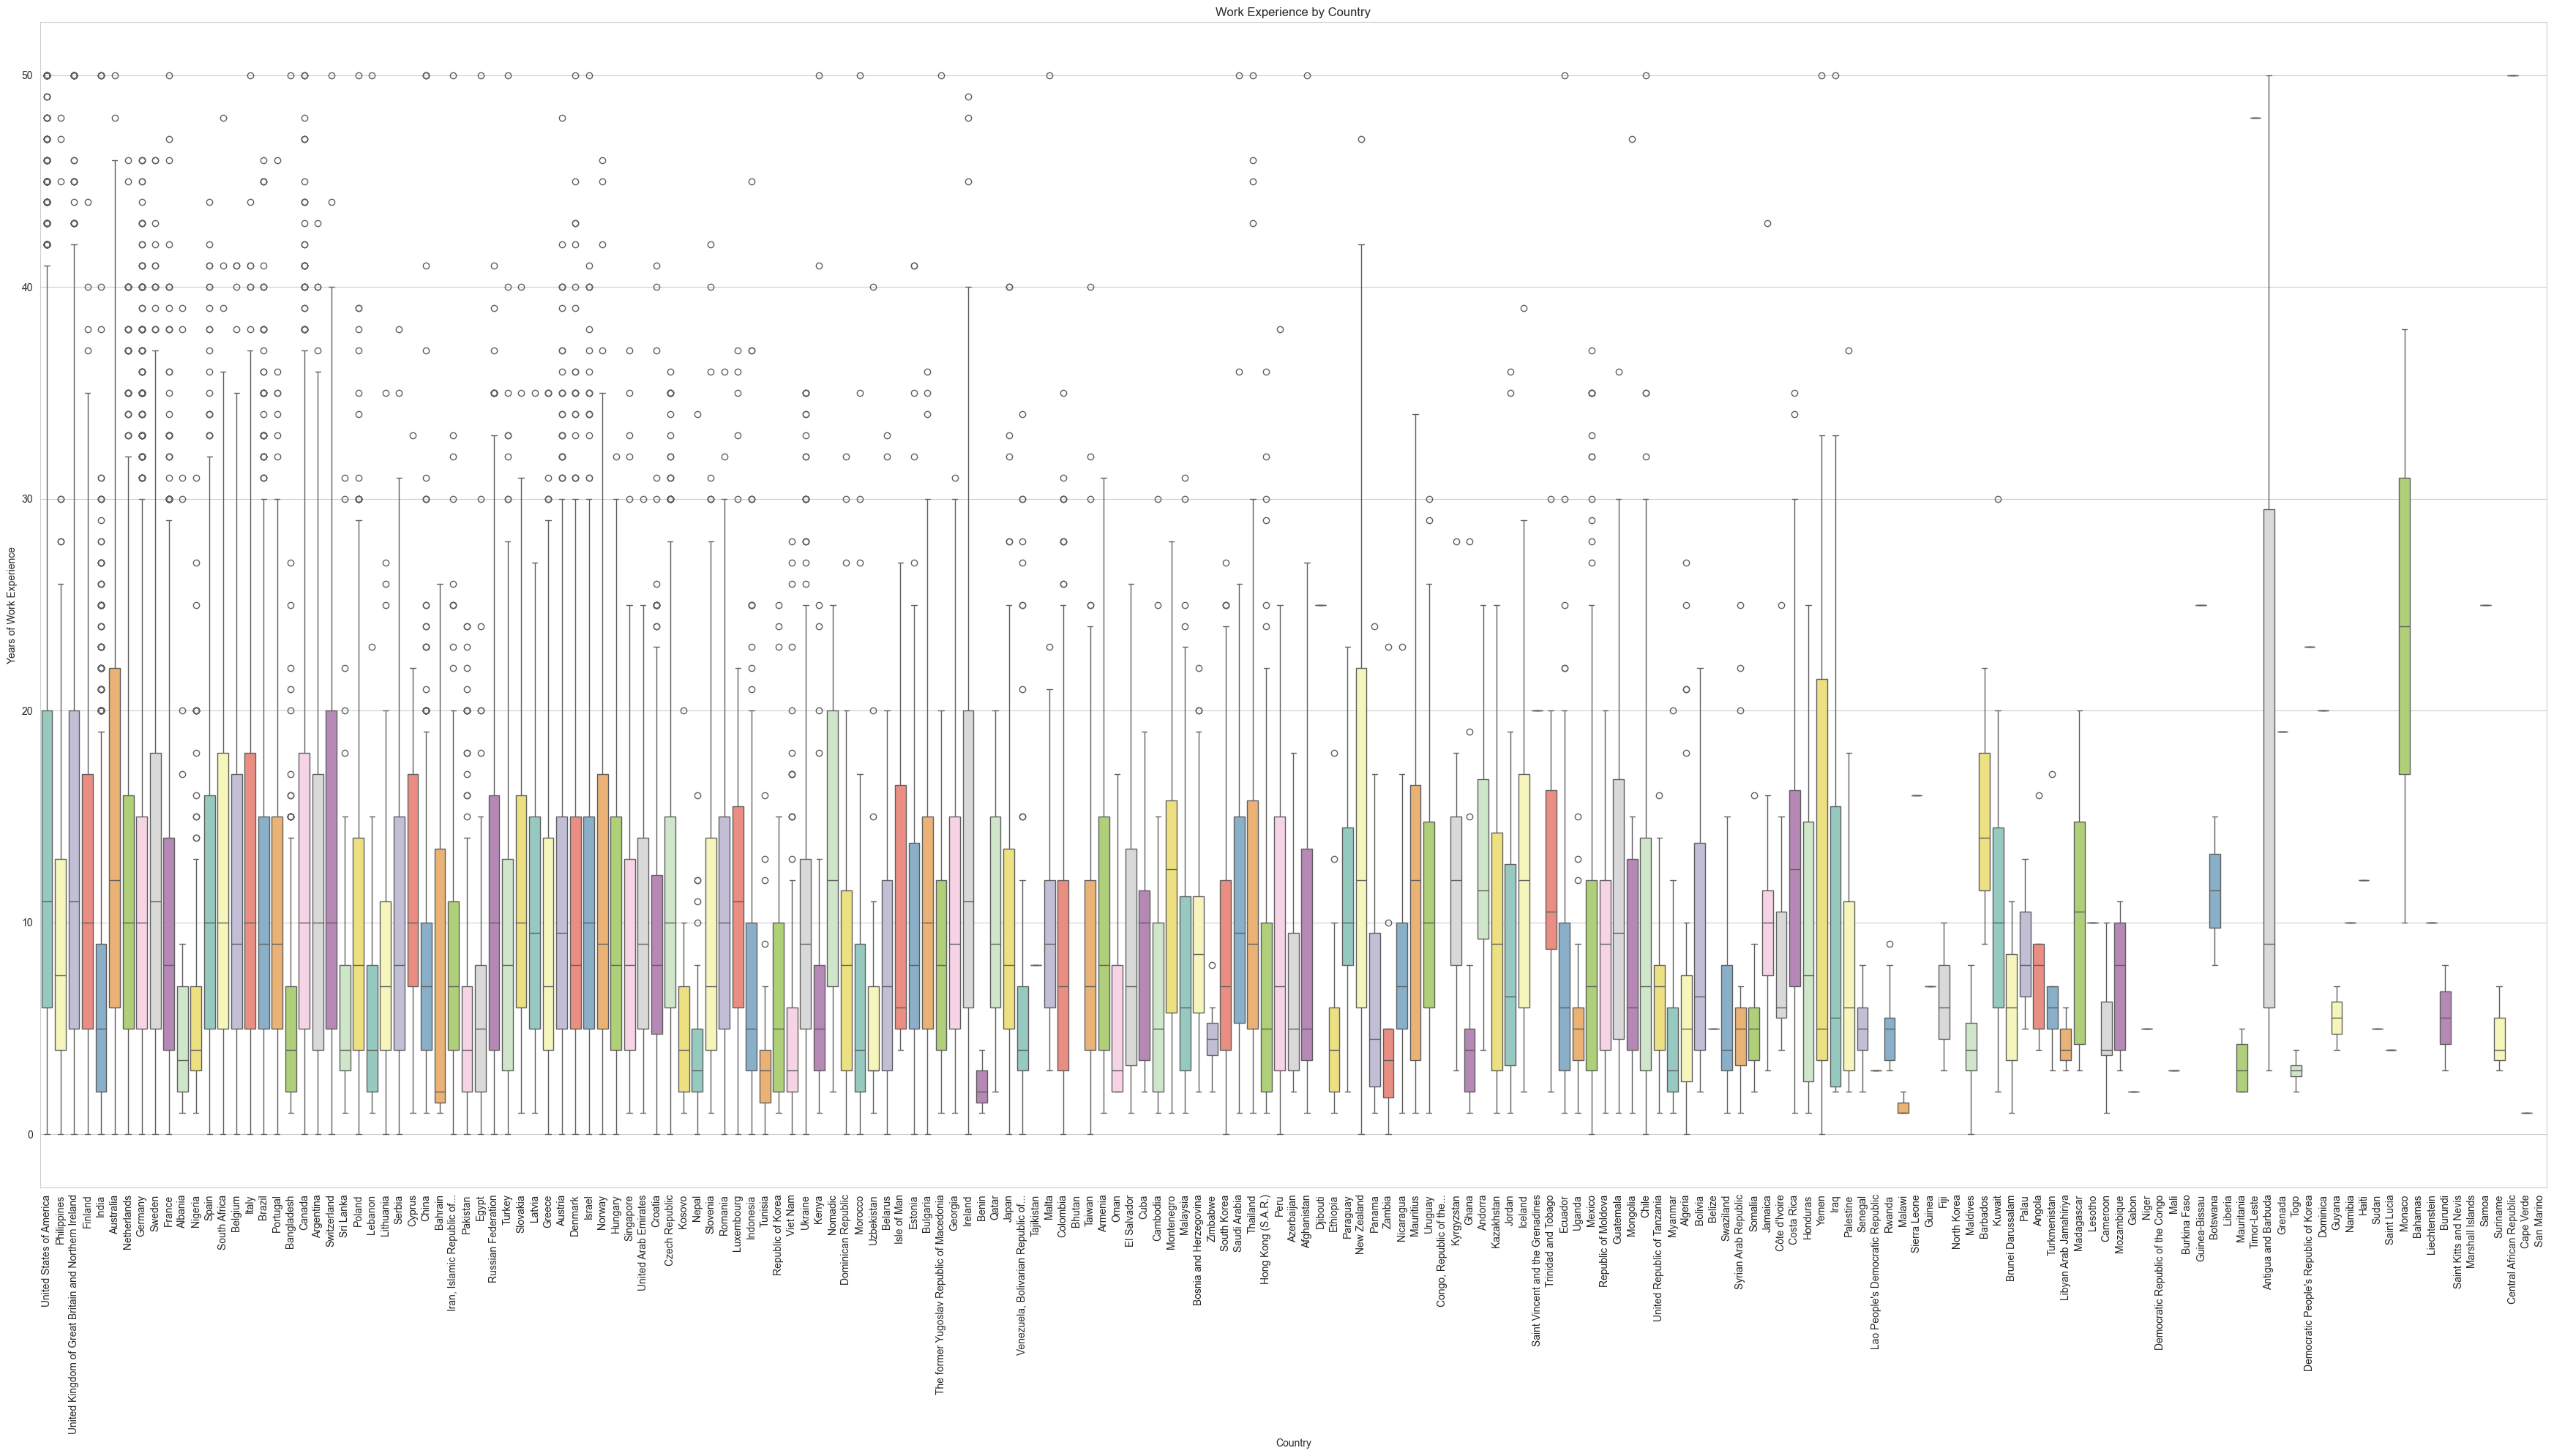

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting box plot for Work Experience by Country
plt.figure(figsize=(35, 20))
sns.boxplot(x='Country', y='WorkExp', data=survey_df, palette='Set3')
plt.xlabel('Country')
plt.ylabel('Years of Work Experience')
plt.title('Work Experience by Country')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30540\3847371378.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='WorkExp', data=survey_df_top_countries, palette='Set3')


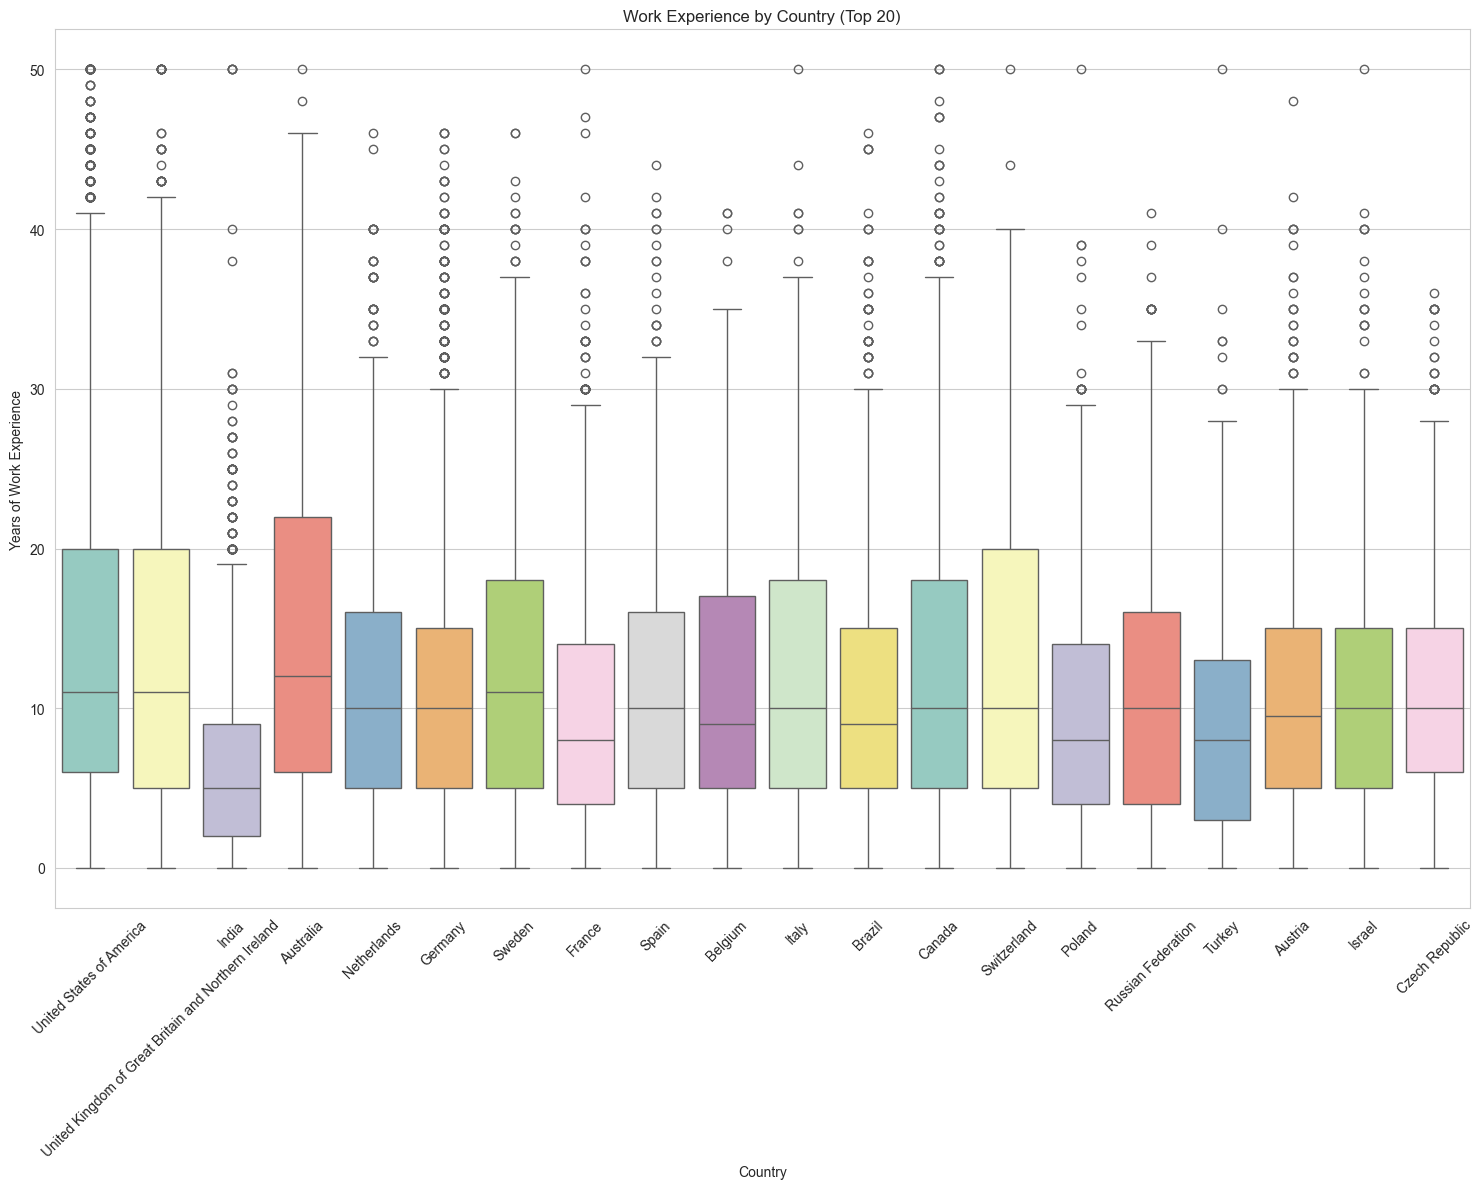

In [ ]:
# Set the number of top countries to include
top_countries = 20

# Get the top N countries based on the number of respondents
top_countries_counts = survey_df['Country'].value_counts().head(top_countries)
top_countries_list = top_countries_counts.index.tolist()

# Filter the DataFrame to include only the top N countries
survey_df_top_countries = survey_df[survey_df['Country'].isin(top_countries_list)]

# Plotting box plot for Work Experience by Country
plt.figure(figsize=(15, 12))
sns.boxplot(x='Country', y='WorkExp', data=survey_df_top_countries, palette='Set3')
plt.xlabel('Country')
plt.ylabel('Years of Work Experience')
plt.title('Work Experience by Country (Top {})'.format(top_countries))
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30540\1156349009.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Employment', y='WorkExp', data=survey_df_top_n, palette='Set3')


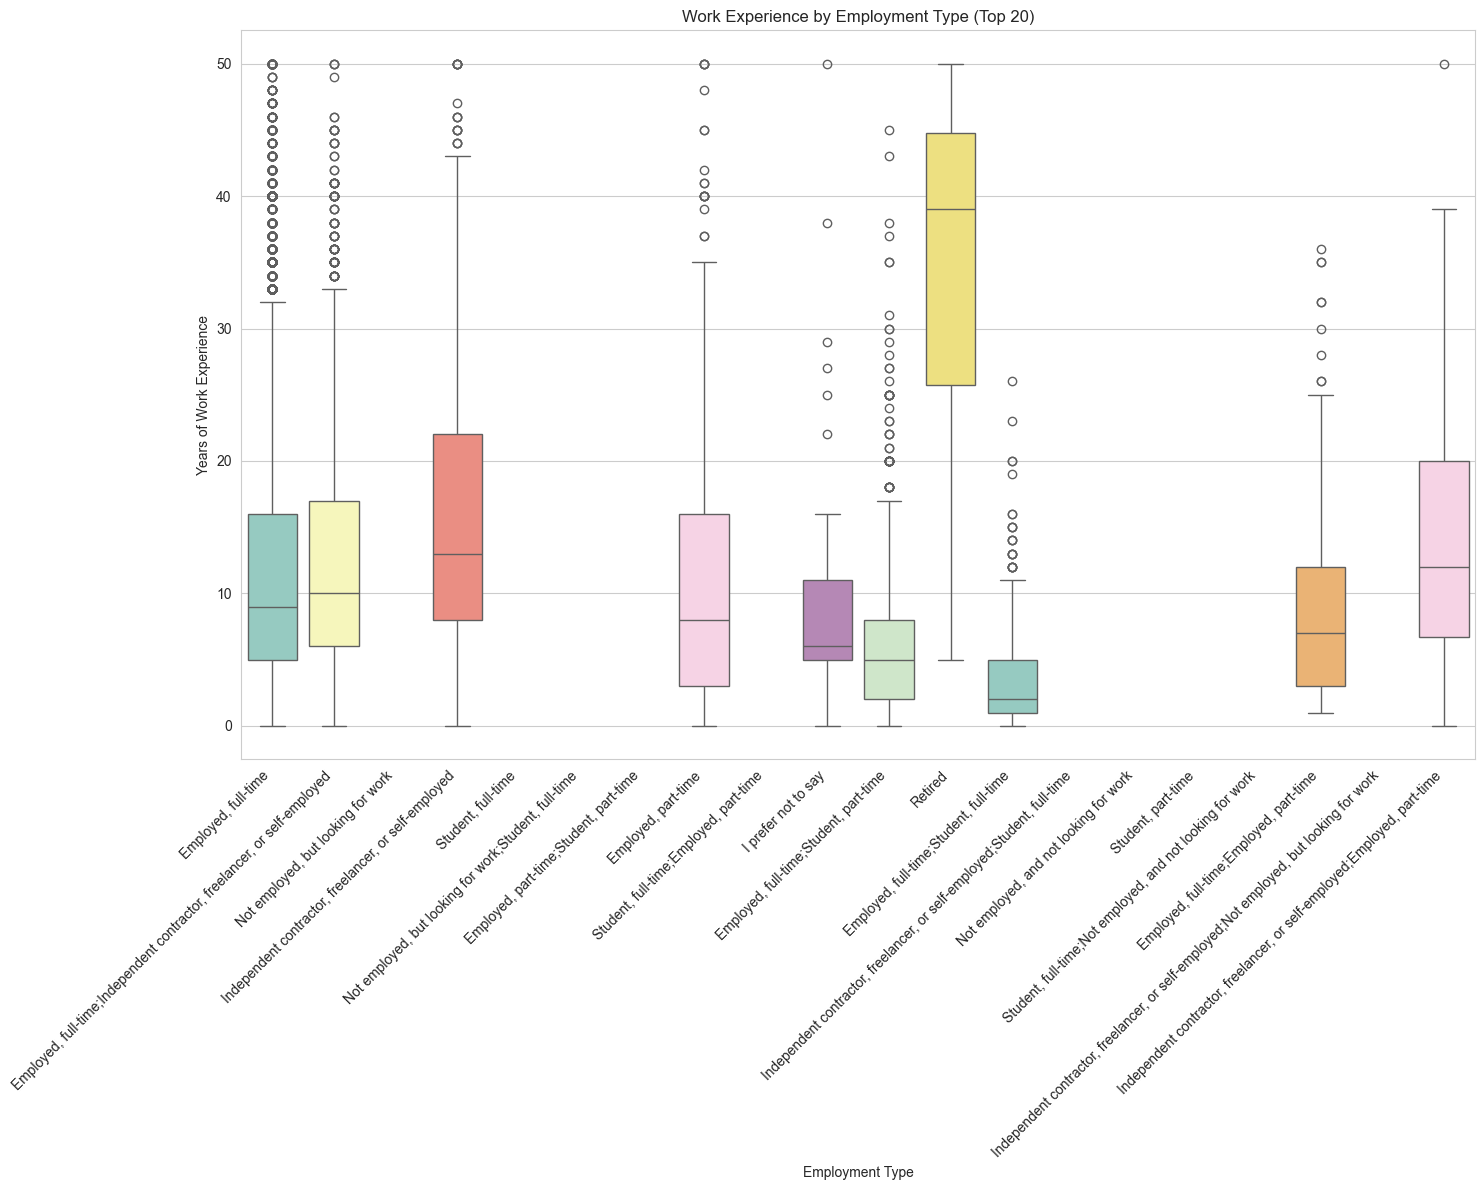

In [ ]:
# Determine the top 20 employment types to include
top_n = 20

# Get the top 20 employment types based on the number of respondents (sorted)
top_employment_types = survey_df['Employment'].value_counts(sort=True).head(top_n).index

# Filter the DataFrame to include only the top 20 employment types
survey_df_top_n = survey_df[survey_df['Employment'].isin(top_employment_types)]

# Plotting box plot for Work Experience by Employment Type (Top 20)
plt.figure(figsize=(15, 12))
sns.boxplot(x='Employment', y='WorkExp', data=survey_df_top_n, palette='Set3')
plt.xlabel('Employment Type')
plt.ylabel('Years of Work Experience')
plt.title('Work Experience by Employment Type (Top {})'.format(top_n))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

In [ ]:
survey_df

,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,AINextSomewhat different,TBranch,ICorPM,WorkExp,TimeSearching,TimeAnswering,ProfessionalTech,Industry,ConvertedCompYearly,YearsCode_Num
1,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9.0,...,NaN,Yes,People manager,10.0,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",285000.0,NaN
2,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23.0,...,NaN,Yes,Individual contributor,23.0,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",250000.0,NaN
3,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NaN,12,7.0,...,NaN,Yes,Individual contributor,7.0,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,156000.0,NaN
4,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,6,4.0,...,NaN,Yes,Individual contributor,6.0,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,23456.0,NaN
5,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,Other,21,21.0,...,NaN,Yes,Individual contributor,22.0,30-60 minutes a day,15-30 minutes a day,DevOps function;Microservices;Observability to...,Other,96828.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,Udemy,20,5.0,...,Writing code;Documenting code;Debugging and ge...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89180,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,NaN,5,NaN,...,Learning about a codebase;Debugging and gettin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89181,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,Codecademy;Coursera,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89182,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,Udemy,3,NaN,...,Learning about a codebase;Writing code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

numeric_columns = survey_df.select_dtypes(include=[np.number]).columns.tolist()

# Filter DataFrame to include only numeric columns
print(survey_df[numeric_columns])

       YearsCodePro     CompTotal  WorkExp  ConvertedCompYearly  YearsCode_Num
1               9.0  2.850000e+05     10.0             285000.0            NaN
2              23.0  2.500000e+05     23.0             250000.0            NaN
3               7.0  1.560000e+05      7.0             156000.0            NaN
4               4.0  1.320000e+06      6.0              23456.0            NaN
5              21.0  7.800000e+04     22.0              96828.0            NaN
...             ...           ...      ...                  ...            ...
89179           5.0  2.000000e+05      NaN                  NaN            NaN
89180           NaN           NaN      NaN                  NaN            NaN
89181           NaN           NaN      NaN                  NaN            NaN
89182           NaN           NaN      NaN                  NaN            NaN
89183          12.0  3.300000e+09     14.0                  NaN            NaN

[89183 rows x 5 columns]


In [ ]:
numeric_columns = ['YearsCodePro','CompTotal','WorkExp','ConvertedCompYearly']
numeric_df = survey_df[numeric_columns]


# Calculate the correlation matrix
correlation_matrix = survey_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: '25-34 years old'

In [ ]:
import statsmodels.api as sm

# Define the independent variables (predictors)
X = survey_df[['Age', 'YearsCode', 'YearsCodePro', 'ConvertedCompYearly']]

# Add a constant term to the independent variables matrix
X = sm.add_constant(X)

# Define the dependent variable (target)
y = survey_df['WorkExp']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:

pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
    --------------------------------------- 0.2/9.8 MB 3.0 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/9.8 MB 4.8 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/9.8 MB 5.5 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/9.8 MB 5.9 MB/s eta 0:00:02
   ------ --------------------------------- 1.5/9.8 MB 6.1 MB/s eta 0:00:02
   ------- -------------------------------- 1.9/9.8 MB 6.2 MB/s eta 0:00:02
   --------- ------------------------------ 2.2/9.8 MB 6.4 MB/s eta 0:00:02
   ---------- ----------------------------- 2.5/9.8 MB 6.5 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/9.8 MB 6.6 MB/s eta 0:00:02
   ------------- -------------------------- 3.2/9.8 MB 6.6 MB/s eta 0:00:01
   -------------- ------------------------- 3.6/9.8 MB 6.7 MB/s eta 0:00:01
   --------------- -------

# 4 Feature Engineeting
## 4.1 Years of Overall Coding Experience
### Create a new feature by converting YearsCode (number of years coding in Total, including non-professional experience) into a numerical format suitable for analysis.

In [ ]:
survey_df

,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,TimeSearching,TimeAnswering,ProfessionalTech,Industry,ConvertedCompYearly
1,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9.0,...,NaN,NaN,Yes,People manager,10.0,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",285000.0
2,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23.0,...,NaN,NaN,Yes,Individual contributor,23.0,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",250000.0
3,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NaN,12,7.0,...,NaN,NaN,Yes,Individual contributor,7.0,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,156000.0
4,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,6,4.0,...,NaN,NaN,Yes,Individual contributor,6.0,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,23456.0
5,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,Other,21,21.0,...,NaN,NaN,Yes,Individual contributor,22.0,30-60 minutes a day,15-30 minutes a day,DevOps function;Microservices;Observability to...,Other,96828.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,Udemy,20,5.0,...,NaN,Writing code;Documenting code;Debugging and ge...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89180,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,NaN,5,NaN,...,NaN,Learning about a codebase;Debugging and gettin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89181,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,Codecademy;Coursera,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89182,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,Udemy,3,NaN,...,NaN,Learning about a codebase;Writing code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89183 entries, 1 to 89183
Data columns (total 68 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  89183 non-null  object 
 1   Employment                           87898 non-null  object 
 2   RemoteWork                           73810 non-null  object 
 3   CodingActivities                     73764 non-null  object 
 4   EdLevel                              87973 non-null  object 
 5   LearnCode                            87663 non-null  object 
 6   LearnCodeOnline                      70084 non-null  object 
 7   LearnCodeCoursesCert                 37076 non-null  object 
 8   YearsCode                            87435 non-null  object 
 9   YearsCodePro                         64217 non-null  float64
 10  DevType                              76872 non-null  object 
 11  OrgSize                     

In [ ]:
survey_df.groupby('YearsCode').size()

YearsCode
1                     1294
10                    6521
11                    2519
12                    3471
13                    2601
14                    2278
15                    4336
16                    1842
17                    1544
18                    1690
19                     826
2                     2826
20                    4021
21                     761
22                    1210
23                    1327
24                     959
25                    2685
26                     706
27                     710
28                     715
29                     324
3                     4269
30                    2078
31                     272
32                     444
33                     496
34                     333
35                    1118
36                     282
37                     312
38                     428
39                     229
4                     4466
40                    1302
41                     227
42                

In [ ]:
survey_df.YearsCode

1        18
2        27
3        12
4         6
5        21
         ..
89179    20
89180     5
89181    10
89182     3
89183    17
Name: YearsCode, Length: 89183, dtype: object

In [ ]:
# Convert YearsofCode dtype into integer
survey_df['YearsCode'] = pd.to_numeric(survey_df['YearsCode'],errors='coerce',downcast='integer')
survey_df.YearsCode

1        18.0
2        27.0
3        12.0
4         6.0
5        21.0
         ... 
89179    20.0
89180     5.0
89181    10.0
89182     3.0
89183    17.0
Name: YearsCode, Length: 89183, dtype: float64

# 4.2 Years of Professional Experience

In [ ]:
survey_df.YearsCodePro

1         9.0
2        23.0
3         7.0
4         4.0
5        21.0
         ... 
89179     5.0
89180     NaN
89181     NaN
89182     NaN
89183    12.0
Name: YearsCodePro, Length: 89183, dtype: float64

In [ ]:
# YearsCodePro is already nemeric


In [ ]:
survey_df.EdLevel

1             Bachelor’s degree (B.A., B.S., B.Eng., etc.)
2             Bachelor’s degree (B.A., B.S., B.Eng., etc.)
3             Bachelor’s degree (B.A., B.S., B.Eng., etc.)
4             Bachelor’s degree (B.A., B.S., B.Eng., etc.)
5        Some college/university study without earning ...
                               ...                        
89179                  Associate degree (A.A., A.S., etc.)
89180         Bachelor’s degree (B.A., B.S., B.Eng., etc.)
89181                                       Something else
89182    Secondary school (e.g. American high school, G...
89183         Bachelor’s degree (B.A., B.S., B.Eng., etc.)
Name: EdLevel, Length: 89183, dtype: object

# 4.3 Education Level Encording
### Encode EdLevel (highest education level) into numerical categories, e.g., associate's degree = 1, bachelor's degree = 2, master's degree = 3, etc.

In [ ]:
survey_df.groupby('EdLevel').size()

EdLevel
Associate degree (A.A., A.S., etc.)                                                    2807
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          36706
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       20543
Primary/elementary school                                                              1905
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         3887
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8897
Some college/university study without earning a degree                                11753
Something else                                                                         1475
dtype: int64

In [ ]:
# Mapping
edu_mapping = {
    'Associate degree (A.A., A.S., etc.)':1,
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)':2,
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)':3,
    'Primary/elementary school':4,
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)':5,
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':6,
    'Some college/university study without earning a degree':7,
    'Something else':9
}
survey_df['EdLevel_Num'] = survey_df['EdLevel'].map(edu_mapping)
survey_df[['EdLevel','EdLevel_Num']]

,EdLevel,EdLevel_Num
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2.0
2,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2.0
3,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2.0
4,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2.0
5,Some college/university study without earning ...,7.0
...,...,...
89179,"Associate degree (A.A., A.S., etc.)",1.0
89180,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2.0
89181,Something else,9.0
89182,"Secondary school (e.g. American high school, G...",6.0


# 4.4 Remote Work Encoding
### Encode RemoteWork (remote work preference) into binary categories (0 or 1) indicating whether the respondent prefers remote work or not.

In [ ]:
survey_df.RemoteWork

1                                      Remote
2        Hybrid (some remote, some in-person)
3        Hybrid (some remote, some in-person)
4                                      Remote
5                                      Remote
                         ...                 
89179                                  Remote
89180    Hybrid (some remote, some in-person)
89181                                     NaN
89182    Hybrid (some remote, some in-person)
89183    Hybrid (some remote, some in-person)
Name: RemoteWork, Length: 89183, dtype: object

In [ ]:
survey_df.groupby('RemoteWork').size()

RemoteWork
Hybrid (some remote, some in-person)    31131
In-person                               12113
Remote                                  30566
dtype: int64

In [ ]:
remotework_map = {
    'Hybrid (some remote, some in-person)':1,
    'In-person':2,
    'Remote':3
}

survey_df['RemoteWork_Num'] = survey_df['RemoteWork'].map(remotework_map)
survey_df[['RemoteWork','RemoteWork_Num']]

,RemoteWork,RemoteWork_Num
1,Remote,3.0
2,"Hybrid (some remote, some in-person)",1.0
3,"Hybrid (some remote, some in-person)",1.0
4,Remote,3.0
5,Remote,3.0
...,...,...
89179,Remote,3.0
89180,"Hybrid (some remote, some in-person)",1.0
89181,NaN,NaN
89182,"Hybrid (some remote, some in-person)",1.0


# 4.5 Development Role One-Hot Encoding
### Use DevType (development role) to create binary features indicating the presence or absence of specific development roles (e.g., backend developer, frontend developer, full-stack developer, etc.).


In [ ]:
data = {
    'EducationLevel': [
        'Bachelor’s degree',
        'Master’s degree',
        'High school diploma',
        'Bachelor’s degree',
        'Associate degree',
        'Master’s degree',
        'Some college/university'
    ]
}
df = pd.DataFrame(data)

# Perform one-hot encoding using pandas
df_encoded = pd.get_dummies(df, columns=['EducationLevel'], prefix='EdLevel')

# Display the encoded DataFrame
print(df_encoded)

   EdLevel_Associate degree  EdLevel_Bachelor’s degree  \
0                     False                       True   
1                     False                      False   
2                     False                      False   
3                     False                       True   
4                      True                      False   
5                     False                      False   
6                     False                      False   

   EdLevel_High school diploma  EdLevel_Master’s degree  \
0                        False                    False   
1                        False                     True   
2                         True                    False   
3                        False                    False   
4                        False                    False   
5                        False                     True   
6                        False                    False   

   EdLevel_Some college/university  
0                        

In [ ]:
survey_df_Encorded = pd.get_dummies(survey_df,columns=['DevType'],prefix='DevType')
survey_df_Encorded

,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,DevType_Marketing or sales professional,DevType_Other (please specify):,DevType_Product manager,DevType_Project manager,DevType_Research & Development role,DevType_Scientist,DevType_Security professional,"DevType_Senior Executive (C-Suite, VP, etc.)",DevType_Student,DevType_System administrator
1,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18.0,9.0,...,False,False,False,False,False,False,False,True,False,False
2,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27.0,23.0,...,False,False,False,False,False,False,False,False,False,False
3,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NaN,12.0,7.0,...,False,False,False,False,False,False,False,False,False,False
4,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,6.0,4.0,...,False,False,False,False,False,False,False,False,False,False
5,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,Other,21.0,21.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,Udemy,20.0,5.0,...,False,False,False,False,False,False,False,False,False,False
89180,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,NaN,5.0,NaN,...,False,False,False,False,False,False,False,False,False,False
89181,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,Codecademy;Coursera,10.0,NaN,...,False,False,False,False,False,False,False,False,False,False
89182,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,Udemy,3.0,NaN,...,False,False,False,False,False,False,False,False,False,True


# 4.6 Language Experience Count
###  Count the number of programming languages (LanguageHaveWorkedWith) the respondent has experience with.

In [ ]:
survey_df.LanguageHaveWorkedWith               

1                               HTML/CSS;JavaScript;Python
2                               Bash/Shell (all shells);Go
3        Bash/Shell (all shells);HTML/CSS;JavaScript;PH...
4                           HTML/CSS;JavaScript;TypeScript
5        Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...
                               ...                        
89179              HTML/CSS;Java;JavaScript;SQL;TypeScript
89180                                 Dart;Java;Python;SQL
89181    Assembly;Bash/Shell (all shells);C;C#;Python;R...
89182    Bash/Shell (all shells);C#;HTML/CSS;Java;JavaS...
89183                      C#;Go;JavaScript;SQL;TypeScript
Name: LanguageHaveWorkedWith, Length: 89183, dtype: object

In [ ]:
survey_df.groupby('LanguageHaveWorkedWith').size()

LanguageHaveWorkedWith
APL                                                                                                                                                                                                                                5
APL;Assembly;Bash/Shell (all shells);C#;C++;Clojure;JavaScript;Python;Rust                                                                                                                                                         1
APL;Assembly;Bash/Shell (all shells);C#;F#;HTML/CSS;OCaml;TypeScript                                                                                                                                                               1
APL;Assembly;Bash/Shell (all shells);C;C#;C++;Clojure;Crystal;Dart;Elixir;F#;Go;Haskell;HTML/CSS;Java;JavaScript;Julia;Kotlin;Lisp;Lua;Nim;OCaml;Perl;PHP;PowerShell;Prolog;Python;R;Raku;Ruby;Rust;Scala;Swift;TypeScript;Zig     1
APL;Assembly;Bash/Shell (all shells);C;C#;C++;Clojure;Elixir;

In [ ]:
# Example DataFrame with 'LanguageHaveWorkedWith' column
data = {
    'RespondentID': [1, 2, 3, 4],
    'LanguageHaveWorkedWith': [
        'Python;JavaScript;SQL',
        'Java;C++;Python;JavaScript',
        'Python;R;SQL',
        'C#;JavaScript;TypeScript;HTML/CSS'
    ]
}
df = pd.DataFrame(data)

# Function to count the number of programming languages
def count_languages(languages_string):
    # Check if the input is Nan or an emptry string
    if pd.isna(languages_string) or languages_string == '':
        return 0
    else:
        # Split the string of languages by semicolon (;) to create a list of languages
        languages_list = languages_string.split(';')
        # Count the number of languages in the list
    return len(languages_list)

# Apply the function to each row in the DataFrame and create a new column 'LanguageCount'
df['LanguageCount'] = df['LanguageHaveWorkedWith'].apply(count_languages)

# Display the DataFrame with the new 'LanguageCount' column
print(df)

   RespondentID             LanguageHaveWorkedWith  LanguageCount
0             1              Python;JavaScript;SQL              3
1             2         Java;C++;Python;JavaScript              4
2             3                       Python;R;SQL              3
3             4  C#;JavaScript;TypeScript;HTML/CSS              4


In [ ]:
print(data)

{'RespondentID': [1, 2, 3, 4], 'LanguageHaveWorkedWith': ['Python;JavaScript;SQL', 'Java;C++;Python;JavaScript', 'Python;R;SQL', 'C#;JavaScript;TypeScript;HTML/CSS']}


In [ ]:


survey_df['LanguageHaveWorkedWith'].fillna('', inplace=True)

survey_df['LanguageCount'] = survey_df['LanguageHaveWorkedWith'].apply(count_languages)
survey_df[['LanguageHaveWorkedWith','LanguageCount']]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26932\313061574.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  survey_df['LanguageHaveWorkedWith'].fillna('', inplace=True)


,LanguageHaveWorkedWith,LanguageCount
1,HTML/CSS;JavaScript;Python,3
2,Bash/Shell (all shells);Go,2
3,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,7
4,HTML/CSS;JavaScript;TypeScript,3
5,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,6
...,...,...
89179,HTML/CSS;Java;JavaScript;SQL;TypeScript,5
89180,Dart;Java;Python;SQL,4
89181,Assembly;Bash/Shell (all shells);C;C#;Python;R...,7
89182,Bash/Shell (all shells);C#;HTML/CSS;Java;JavaS...,11


# 4.7 Database Experience Count
### Count the number of databases (DatabaseHaveWorkedWith) the respondent has experience with.


In [ ]:
# it is necessary to treat for empty values first
survey_df['DatabaseHaveWorkedWith'].fillna('', inplace=True)

survey_df['DatabaseHaveWorkedWithCount'] = survey_df['DatabaseHaveWorkedWith'].apply(count_languages)
survey_df[['DatabaseHaveWorkedWith','DatabaseHaveWorkedWithCount']]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26932\113391989.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  survey_df['DatabaseHaveWorkedWith'].fillna('', inplace=True)


,DatabaseHaveWorkedWith,DatabaseHaveWorkedWithCount
1,Supabase,1
2,,0
3,PostgreSQL;Redis,2
4,BigQuery;Elasticsearch;MongoDB;PostgreSQL,4
5,BigQuery;Cloud Firestore;PostgreSQL;Redis,4
...,...,...
89179,MongoDB;MySQL;PostgreSQL;SQLite,4
89180,PostgreSQL,1
89181,SQLite,1
89182,MariaDB;Microsoft SQL Server;MongoDB;MySQL;Red...,6


# 4.8 Platform Experience Count
### Count the number of platforms (PlatformHaveWorkedWith) the respondent has experience with.



In [ ]:
# it is necessary to treat for empty values first
survey_df['PlatformHaveWorkedWith'].fillna('', inplace=True)

survey_df['PlatformHaveWorkedWithCount'] = survey_df['PlatformHaveWorkedWith'].apply(count_languages)
survey_df[['PlatformHaveWorkedWith','PlatformHaveWorkedWithCount']]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26932\4007932615.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  survey_df['PlatformHaveWorkedWith'].fillna('', inplace=True)


,PlatformHaveWorkedWith,PlatformHaveWorkedWithCount
1,Amazon Web Services (AWS);Netlify;Vercel,3
2,Amazon Web Services (AWS);Google Cloud;OpenSta...,5
3,Cloudflare;Heroku,2
4,Amazon Web Services (AWS);Firebase;Heroku;Netl...,5
5,Amazon Web Services (AWS);Cloudflare;Google Cloud,3
...,...,...
89179,Digital Ocean;Firebase;Google Cloud;Heroku;Vercel,5
89180,,0
89181,Amazon Web Services (AWS),1
89182,Amazon Web Services (AWS);Cloudflare;Google Cl...,4


# 4.9 Miscellaneous Technology Count
### Count the number of miscellaneous technologies (MiscTechHaveWorkedWith) the respondent has experience with.


In [ ]:
# it is necessary to treat for empty values first
survey_df['MiscTechHaveWorkedWith'].fillna('', inplace=True)

survey_df['MiscTechHaveWorkedWithCount'] = survey_df['MiscTechHaveWorkedWith'].apply(count_languages)
survey_df[['MiscTechHaveWorkedWith','MiscTechHaveWorkedWithCount']]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26932\4103729106.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  survey_df['MiscTechHaveWorkedWith'].fillna('', inplace=True)


,MiscTechHaveWorkedWith,MiscTechHaveWorkedWithCount
1,Electron;React Native;Tauri,3
2,,0
3,,0
4,,0
5,,0
...,...,...
89179,Flutter,1
89180,Flutter;Opencv;RabbitMQ;Spring Framework;Torch...,5
89181,NumPy;Pandas;TensorFlow,3
89182,CUDA;NumPy;Torch/PyTorch,3


# 4.10 Office Stack Asynchronous Tools Count
### Count the number of asynchronous office stack tools (OfficeStackAsyncHaveWorkedWith) the respondent has experience with.


In [ ]:
# it is necessary to treat for empty values first
survey_df['OfficeStackAsyncHaveWorkedWith'].fillna('', inplace=True)

survey_df['OfficeStackAsyncHaveWorkedWithCount'] = survey_df['OfficeStackAsyncHaveWorkedWith'].apply(count_languages)
survey_df[['OfficeStackAsyncHaveWorkedWith','OfficeStackAsyncHaveWorkedWithCount']]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26932\376513989.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  survey_df['OfficeStackAsyncHaveWorkedWith'].fillna('', inplace=True)


,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncHaveWorkedWithCount
1,Asana;Basecamp;GitHub Discussions;Jira;Linear;...,7
2,Markdown File;Stack Overflow for Teams,2
3,Jira,1
4,Confluence;Jira;Notion,3
5,Jira;Markdown File;Notion;Stack Overflow for T...,4
...,...,...
89179,Asana;Confluence;Jira;Markdown File;Miro;Notio...,8
89180,Jira,1
89181,,0
89182,Confluence;Jira;Trello,3


# 4.11 Stack Overflow Usage Frequency Encoding
### Encode SOVisitFreq (frequency of visiting Stack Overflow) into numerical categories (e.g., daily = 3, weekly = 2, monthly = 1, rarely = 0).


In [ ]:
survey_df.groupby('SOVisitFreq').size()

SOVisitFreq
A few times per month or weekly        20312
A few times per week                   28085
Daily or almost daily                  22124
Less than once per month or monthly     4667
Multiple times per day                 11952
dtype: int64

In [ ]:
SOVisitFreq_map = {
    'Multiple times per day':1,
    'Daily or almost daily':2,
    'A few times per week':3,
    'A few times per month or weekly':4,
    'Less than once per month or monthly':5
}

survey_df['SOVisitFreq_Num'] = survey_df['SOVisitFreq'].map(SOVisitFreq_map)
survey_df[['SOVisitFreq','SOVisitFreq_Num']]

,SOVisitFreq,SOVisitFreq_Num
1,Daily or almost daily,2.0
2,A few times per month or weekly,4.0
3,A few times per week,3.0
4,A few times per week,3.0
5,Daily or almost daily,2.0
...,...,...
89179,Multiple times per day,1.0
89180,Multiple times per day,1.0
89181,NaN,NaN
89182,A few times per month or weekly,4.0
